In [20]:
# Import SQLAlchemy "automap" and other dependencies
from config import (user, password, host, port, db_name)
import sqlalchemy
from sqlalchemy import create_engine, inspect, MetaData
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Create an engine and connect it
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{db_name}')
conn = engine.connect()

In [22]:
# Create dataframes from db table

salary_df = pd.read_sql("SELECT * FROM salary", conn)
department_df = pd.read_sql("SELECT * FROM department", conn)
dept_emp_df = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager_df = pd.read_sql("SELECT * FROM dept_manager", conn)
employees_df = pd.read_sql("SELECT * FROM employees", conn)
titles_df = pd.read_sql("SELECT * FROM titles", conn)

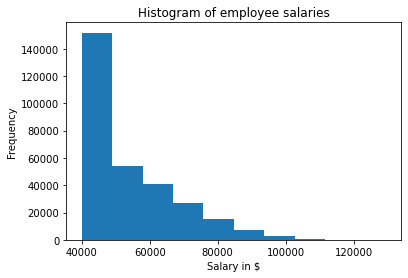

In [23]:
# Histogram of salaries

salary_df['salary'].plot(kind = 'hist')
plt.xlabel("Salary in $")
plt.title("Histogram of employee salaries")
plt.show()

In [27]:
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [28]:
# Bar chart of average salary by title
# First, merge title and employee tables

merged_df_1 = pd.merge(employees_df, titles_df, left_on = "emp_title", right_on = "title_id", how = "inner")
merged_df_1

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,s0001,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,s0001,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,s0001,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,s0001,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,s0001,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,m0001,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,m0001,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,m0001,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,m0001,Manager


In [44]:
# Then merge the previous table with the salaries table

merged_df_2 = pd.merge(merged_df_1, salary_df, on = "emp_no", how = "inner")
merged_means_df = merged_df_2[['title', 'salary']]

In [45]:
# Group by title and obtain mean of salaries

merged_means_df = merged_means_df.groupby('title').mean()
merged_means_df['salary'] = round(merged_means_df['salary'])
merged_means_df

,salary
title,
Assistant Engineer,48564.0
Engineer,48535.0
Manager,51531.0
Senior Engineer,48507.0
Senior Staff,58550.0
Staff,58465.0
Technique Leader,48583.0


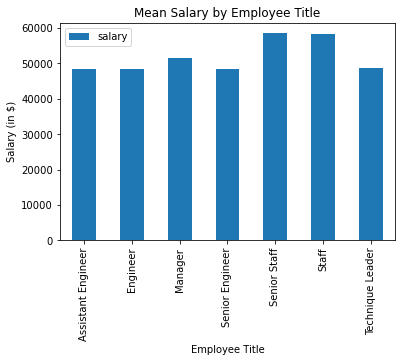

In [46]:
# Build bar plot

merged_means_df.plot(kind = 'bar')
plt.title("Mean Salary by Employee Title")
plt.ylabel("Salary (in $)")
plt.xlabel("Employee Title")
plt.show()

In [48]:
# Epilogue

my_info = merged_df_2.loc[merged_df_2["emp_no"] == 499942]
my_info

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary
287532,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997,e0004,Technique Leader,40000
